# Problem Statement
The Level 1 of the Cognifyz Data Science Internship, focuses on the exploration and analysis of a restaurant dataset. The level comprises three key tasks: Data Exploration and Preprocessing, Descriptive Analysis, and Geospatial Analysis.







# Project Objectives:

- Gain proficiency in data exploration and preprocessing.
- Perform descriptive analysis to understand dataset characteristics.
- Apply geospatial analysis techniques to uncover location-based insights.
- Develop foundational data science skills for the restaurant industry.

Key Tasks in Level 1:

## Task 1: Data Exploration and Preprocessing

- Explore the dataset to understand its structure, including the number of rows and columns.
- Address missing values in each column, ensuring data integrity.
- Perform data type conversions as necessary.
- Analyze the distribution of the target variable ("Aggregate rating") and identify potential class imbalances.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
#dataset loading

df=pd.read_csv('Dataset .csv')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Checking number of rows and columns of the dataset using shape

print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  9551
Number of columns are:  21


In [5]:
# Dataset Duplicate Value Count

dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [6]:
# Missing Values/Null Values Count

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Text(0.5, 1.0, 'Places of missing values in Dataset')

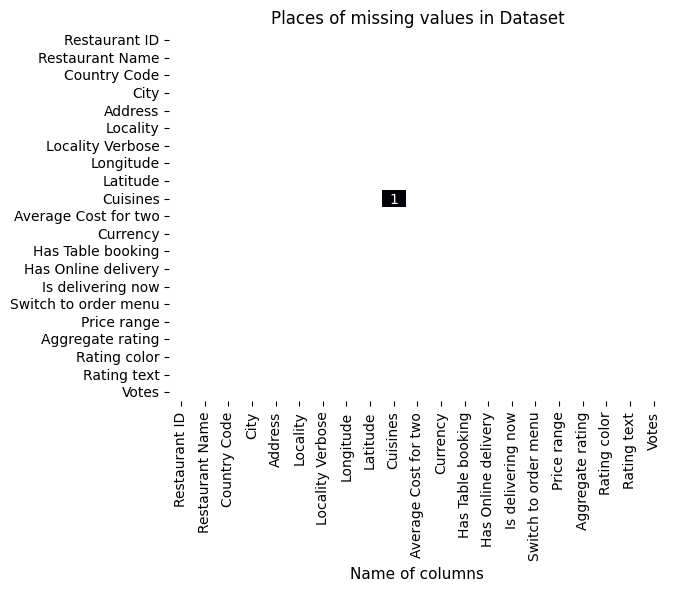

In [7]:
sns.heatmap(df.isnull().corr(),cmap = 'magma',cbar = False, annot= True);
plt.xlabel('Name of columns', fontsize=11)
plt.title('Places of missing values in Dataset', fontsize=12)

In [8]:
#dropping missing values because null value is small
df = df.dropna(subset=['Cuisines'])

In [9]:
#again checking null values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
#Checking Data Type

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [11]:
#Distribution of The Target Variable

# Distribution of the target variable ("Aggregate rating") and identify class imbalance

target_counts = df['Aggregate rating'].value_counts()
print("Distribution of target variable:")
print(target_counts)


Distribution of target variable:
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     495
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     399
2.9     381
3.9     332
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     143
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      41
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64


<Axes: xlabel='Aggregate rating', ylabel='count'>

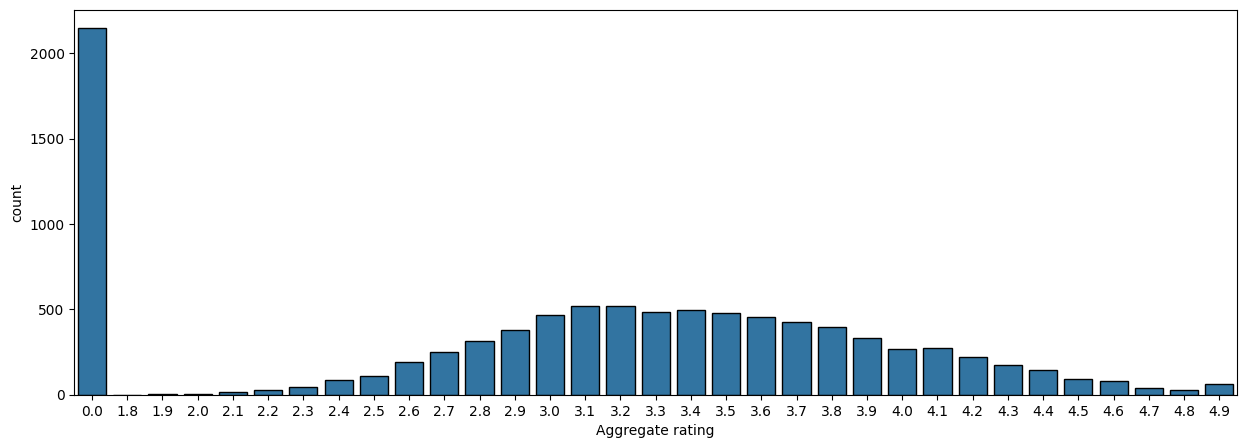

In [11]:
# Converting 'Aggregate rating' to numeric, coerce errors to NaN
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Drop rows with NaN values in 'Aggregate rating'
numeric_df = df.dropna(subset=['Aggregate rating'])
plt.figure(figsize = (15,5))
sns.countplot(x='Aggregate rating', data=numeric_df, edgecolor='black')


## Insights from Task 1

- The Restuarant dataset consists of various restuarants information of different cities. Includes information such as restaurant name, city, address, locality, cuisines, rating and price range, among other things.
- There are 9551 rows and 21 columns provided in the data.
- Null values are only present in cuisines; Since there are only few null values present in cuisines (only 9) i will remove them from the data.
- No duplicate values exist.
- Data type conversion not required.
- Distribution of the target variable ("Aggregate rating") well balanced.

## Task 2: Descriptive Analysis

- Calculate essential statistical measures (e.g., mean, median, standard deviation) for numerical columns.
- Investigate the distribution of categorical variables, such as "Country Code," "City," and "Cuisines."
- Identify the top cuisines and cities with the highest number of restaurants, gaining insights into customer preferences.

In [12]:
# Basic statistical measures (mean, median, standard deviation, etc.) for numerical columns
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [13]:
# Individual statistics
# Calculate mean for numerical columns
numeric_columns = df.select_dtypes(include=['int', 'float'])
mean = numeric_columns.mean()
print(f"Mean for numerical columns:\n{mean}")

Mean for numerical columns:
Restaurant ID           9.043301e+06
Country Code            1.817921e+01
Longitude               6.427500e+01
Latitude                2.584853e+01
Average Cost for two    1.200326e+03
Price range             1.804968e+00
Aggregate rating        2.665238e+00
Votes                   1.567721e+02
dtype: float64


In [14]:
# Calculate median for numerical columns
median = numeric_columns.median()
print(f"\nMedian for numerical columns:\n{median}")


Median for numerical columns:
Restaurant ID           6.002726e+06
Country Code            1.000000e+00
Longitude               7.719203e+01
Latitude                2.857044e+01
Average Cost for two    4.000000e+02
Price range             2.000000e+00
Aggregate rating        3.200000e+00
Votes                   3.100000e+01
dtype: float64


In [15]:
# Calculate standard deviation for numerical columns
std_dev = numeric_columns.std()
print(f"\nStandard deviation for numerical columns:\n{std_dev}")


Standard deviation for numerical columns:
Restaurant ID           8.791967e+06
Country Code            5.645160e+01
Longitude               4.119760e+01
Latitude                1.101009e+01
Average Cost for two    1.612874e+04
Price range             9.055631e-01
Aggregate rating        1.516588e+00
Votes                   4.302033e+02
dtype: float64


## Distribution of Categorical Variables

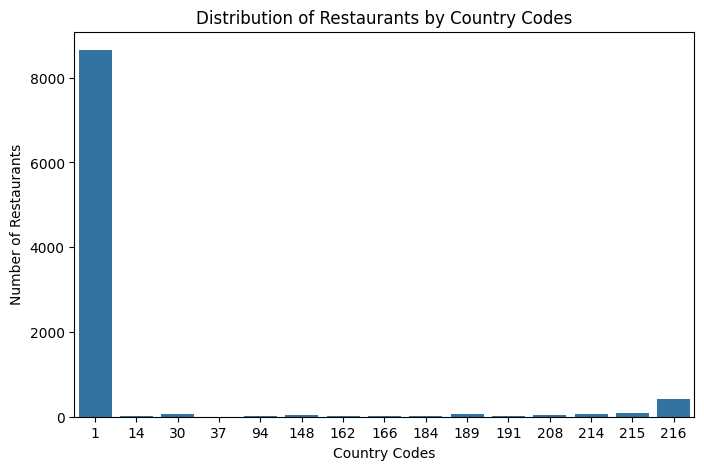

In [17]:
# Distribution of categorical variables like 'Country Code', 'City', and 'Cuisines'


plt.figure(figsize=(8, 5))
sns.countplot(x = df['Country Code'])

plt.xlabel('Country Codes')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Restaurants by Country Codes')

plt.show()

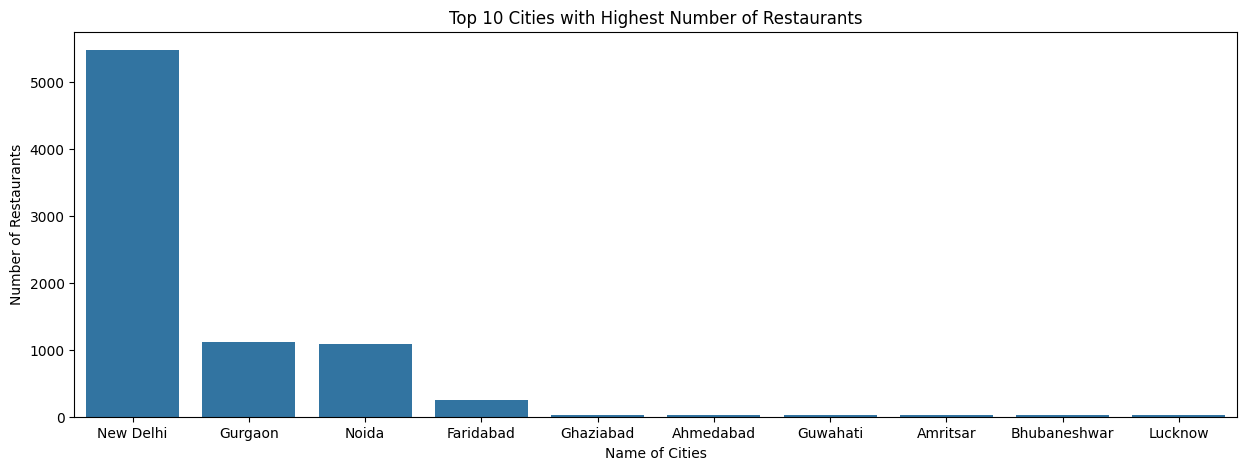

In [18]:
plt.figure(figsize=(15,5))

sns.countplot(x = df['City'], order=df.City.value_counts().iloc[:10].index)
plt.xlabel('Name of Cities')
plt.ylabel('Number of Restaurants')

plt.title('Top 10 Cities with Highest Number of Restaurants')

plt.show()

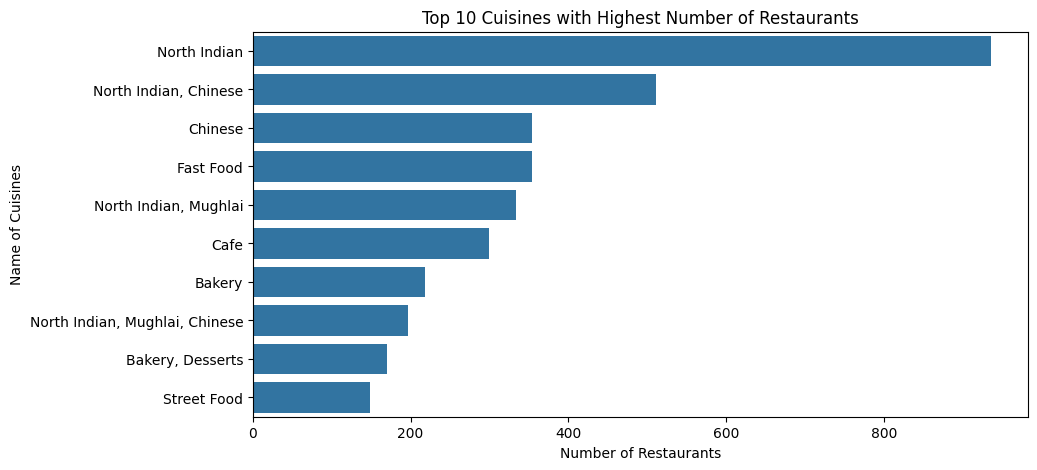

In [19]:
plt.figure(figsize=(10, 5))

sns.countplot(y = df['Cuisines'], order=df.Cuisines.value_counts().iloc[:10].index)
plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cuisines')
plt.title('Top 10 Cuisines with Highest Number of Restaurants')

plt.show()

## Top Cuisines and Cities

In [20]:
top_cuisines = df['Cuisines'].value_counts().head(10)

print("Top 10 Cuisines with Highest Number of Restaurants:")
print(top_cuisines)

Top 10 Cuisines with Highest Number of Restaurants:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [21]:
#the top 10 cities
top_cities = df['City'].value_counts().head(10)

print("Top 10 Cities with Highest Number of Restaurants:")
print(top_cities)

Top 10 Cities with Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64


In [24]:
pip install shapely


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 217.9 kB/s eta 0:00:07
    --------------------------------------- 0.0/1.4 MB 217.9 kB/s eta 0:00:07
   - -------------------------------------- 0.1/1.4 MB 272.3 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.4 MB 272.3 kB/s eta 0:00:06
   - -------------------------------------- 0.1/1.4 MB 272.3 kB/s eta 0:00:06
   --- ------------------------------------ 0.1/1.4 MB 327.2 kB/s eta 0:00:05
   --- ------------------------------------ 0.1/1.4 MB 369.8 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.4 MB 366.6 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.4 MB 366.6 kB/s eta 0:00:04
   ----- ---------------------------------- 0.2/1.4 MB 377.1 kB/s eta 0:00:04
   ----- ---

## Insights from Task 2

- Found the mean, median, mode values and other statistical measures for the numerical columns like 'Restaurant ID', 'Longitude', 'Latitude', 'Price range', etc.
- Country code 1 and 216 are with highest number of restaurants.
- New Delhi, Gurgaon and Noida are in top with highest number of restaurants.
- North Indian and Chinese cuisine are in top with highest number of restaurants

In [27]:
!pip install geopandas


  Using cached geopandas-0.14.3-py3-none-any.whl.metadata (1.5 kB)
  Using cached fiona-1.9.5-cp311-cp311-win_amd64.whl.metadata (51 kB)
  Using cached pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata (31 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached geopandas-0.14.3-py3-none-any.whl (1.1 MB)
Using cached fiona-1.9.5-cp311-cp311-win_amd64.whl (22.9 MB)
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.1 MB 325.1 kB/s eta 0:00:19
   ---------------------------------------- 0.0/6.1 MB 325.1 kB/s eta 0:00:19
   ---------------------------------------- 0.0/6.1 MB 325.1 kB/s eta 0:00:19
   ---------------------------------------- 0.0/6.1 MB 325.1 kB/s eta 0:00:19
   ---------------------------------------- 0.1/6.1 MB 262.6 kB/s eta 0:00:23
   --------------------------

## Task 3: Geospatial Analysis

- Visualize restaurant locations using latitude and longitude information, providing a spatial perspective.
- Analyze the geographical distribution of restaurants across different cities and countries.
- Explore potential correlations between the restaurant's location and its rating, uncovering location-based patterns.

### Visualize Locations of Restaurants

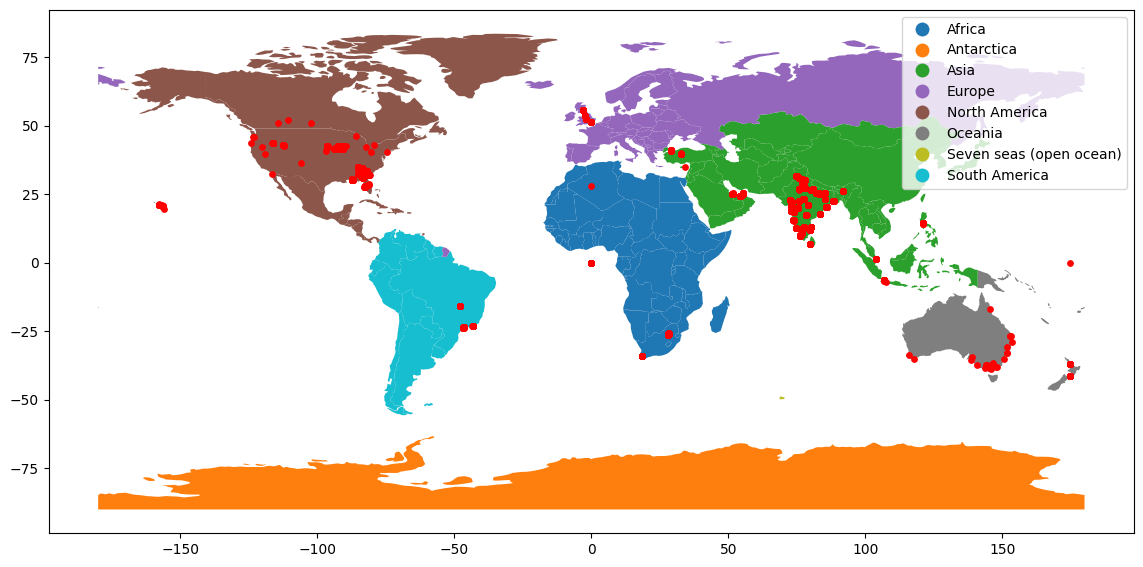

In [28]:
# Locations of restaurants on a map using latitude and longitude information

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.Longitude, df.Latitude)
)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot("continent", legend = True, figsize=(14, 12)), marker='o', color='red', markersize=15)

plt.show()

### Distribution of Restaurants by City


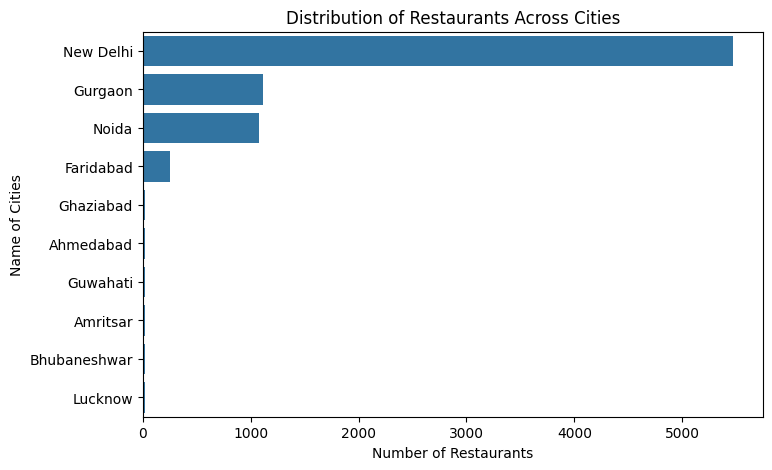

In [29]:
plt.figure(figsize=(8, 5))

sns.countplot(y = df['City'], order=df.City.value_counts().iloc[:10].index)

plt.xlabel('Number of Restaurants')
plt.ylabel('Name of Cities')
plt.title('Distribution of Restaurants Across Cities')
plt.show()

### Correlation Between the Restaurant's Location and its Rating

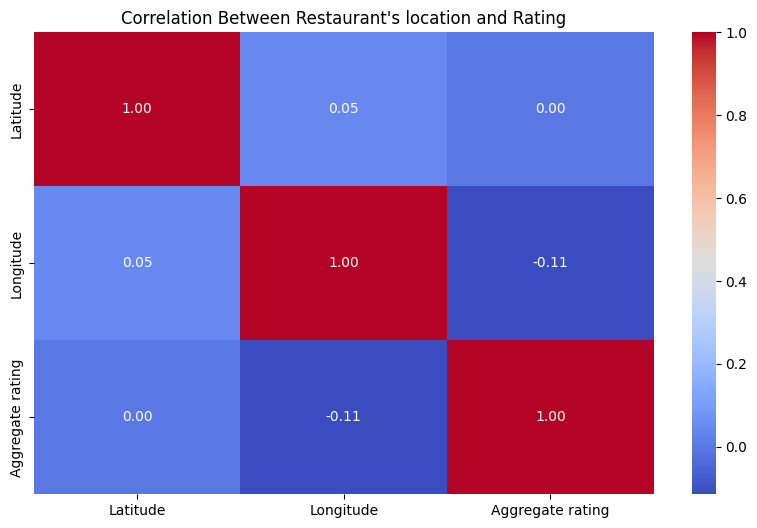

In [30]:
plt.figure(figsize=(10, 6))

correlation_matrix = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Restaurant's location and Rating")
plt.show()


## Insights from Task 3
- North America and Asia(mainly India) have the most number of restaurants. Followed by Oceania and others.
- New Delhi have the most number of restaurants. Followed by Gurgaon, Noida and Faridabad.
- There is no correlation between Latitude and Rating. But, Longitude and Rating are negatively correlated.

# Conclusion

## Data Overview:

- The dataset includes restaurant details across various cities with 9,551 rows and 21 columns.
- Minimal null values (9) were found only in the 'Cuisines' column.
- No duplicates exist, and data type conversion wasn't needed.
- The 'Aggregate rating' distribution is well-balanced.

## Descriptive Insights:

- Key statistical measures for numerical columns were identified.
- Country codes 1 and 216 have the most restaurants.
- New Delhi, Gurgaon, and Noida are top cities with the highest restaurant counts.
- North Indian and Chinese cuisines are most popular.

## Geospatial Analysis:

- North America and Asia (mainly India) have the most number of restaurants.
- New Delhi leads in the number of restaurants, followed by Gurgaon, Noida, and Faridabad.
- Latitude and rating show no correlation, while longitude and rating are negatively correlated.
- These insights offer a comprehensive analysis of the restaurant dataset reveals key data characteristics, descriptive insights, and geospatial patterns, informs further analysis.